In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('Train_Data.csv')
test_data = pd.read_csv('Test_Data.csv')
train_data.head(3)

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032


# Data Preprocessing
- New Features Created:
    - High Diff
        - The difference of the high prices between this time and the last time.
    - Low Diff
        - The difference of the low prices between this time and the last time.
    - Close Diff
        - The difference of the close prices between this time and the last time.
    - Up_Down Range
        - The range of the price it rise and fall in this day.
- Set answers we want
    - Rise
        - Depending on whether it rises as the next day announced.
- Normalize the Prices
- Trim the first and the last tuple
    Since we create new feature and our answer with neighbors of each tuple (or row), data of the first and the last one will be incomplete

In [2]:
for data_set in [train_data, test_data]:
    # Create new features
    for i in range(1, data_set.shape[0]):
        data_set.loc[i, 'High Diff'] = data_set.loc[i, 'High Price'] - data_set.loc[i-1, 'High Price']
        data_set.loc[i, 'Low Diff'] = data_set.loc[i, 'Low Price'] - data_set.loc[i-1, 'Low Price']
        data_set.loc[i, 'Close Diff'] = data_set.loc[i, 'Close Price'] - data_set.loc[i-1, 'Close Price']
    data_set['Up_Down Range'] = (data_set['High Price'] - data_set['Low Price'])

    # Set answers
    for i in range(data_set.shape[0]-1):
        data_set.loc[i, 'Rise'] = 1 if data_set.loc[i+1, 'Close Diff'] > 0 else 0
        
    # Normalize prices and Volume
    for price in ['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']:
        mean = np.average(data_set[price])
        data_set[price] /= mean
    
# split and categorize the data set
x_train = train_data.drop(index=[0, train_data.shape[0]-1], columns=['Date', 'Rise'])
y_train = train_data.drop(index=[0, train_data.shape[0]-1])['Rise']
x_test = test_data.drop(index=[0, test_data.shape[0]-1], columns=['Date', 'Rise'])
y_test = test_data.drop(index=[0, test_data.shape[0]-1])['Rise']
x_train.head()

,Open Price,Close Price,High Price,Low Price,Volume,High Diff,Low Diff,Close Diff,Up_Down Range
1,0.561045,0.559795,0.562734,0.558162,1.835998,1.90,20.18,-4.35,17.10
2,0.562252,0.564171,0.567072,0.562866,1.828778,7.22,7.75,7.25,16.57
3,0.560006,0.547240,0.557219,0.547746,1.595568,-16.40,-24.91,-28.05,25.08
4,0.546891,0.549099,0.546735,0.544371,1.692765,-17.45,-5.56,3.08,13.19
5,0.549415,0.537402,0.547894,0.539211,1.599488,1.93,-8.50,-19.38,23.62


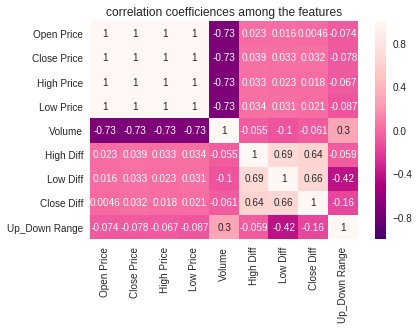

In [3]:
corr = x_train.corr()
plt.title('correlation coefficiences among the features')
sns.heatmap(corr, annot=True, cmap='RdPu_r')

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, metrics, model_selection

clf = LogisticRegression().fit(x_train, y_train)

train_result = clf.predict(x_train)
test_result = clf.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, train_result)
accuracy_test = metrics.accuracy_score(y_test, test_result)
print('Train accuracy: %s' % accuracy_train)
print('Test accuracy: %s' % accuracy_test)

Train accuracy: 0.550839964633
Test accuracy: 0.528


## SVM

In [ ]:
from sklearn.svm import SVC

penalties = [0.05, 1, 10]

for kernel in ['linear', 'rbf', 'sigmoid']:
    print("Kernel = " + kernel)
    for penalty in penalties:
        svm = SVC(C=penalty, kernel=kernel, probability=True)
        svm.fit(x_train, y_train)

        accuracy = metrics.accuracy_score(y_test, svm.predict(x_test)) * 100
        print("\tPenalty = %.2f, Accuracy = %.2f %%" % (penalty, accuracy))
    print("")

Kernel = linear
	Penalty = 0.05, Accuracy = 52.00 %


## Neural Network

In [ ]:
from keras import models, layers, optimizers, regularizers

# parameters used in the NN model 1
hidden_units = 10
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 5          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent updat

In [ ]:
# NN model 1
model = models.Sequential()

# building two layers
model.add(layers.Dense(input_dim=9, units=hidden_units, activation=None))
model.add(layers.Dense(input_dim=hidden_units, units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=learning_rate), metrics=['accuracy'])

model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

accuracy_train = model.evaluate(x_train, y_train, batch_size=batch_size)[1]
accuracy_test = model.evaluate(x_test, y_test, batch_size=batch_size)[1]
print('Training accuracy: %s' % accuracy_train)
print('Testing accuracy: %s' % accuracy_test)

In [ ]:
# parameters used in the NN model 2
hidden_units = 15
epochs = 10
batch_size = 32

In [ ]:
# NN model 2
model = models.Sequential()

# building six layers
model.add(layers.Dense(input_dim=9, units=10, activation='relu'))
model.add(layers.Dense(input_dim=10, units=10, activation='relu'))
model.add(layers.Dense(input_dim=10, units=10, activation='relu'))
model.add(layers.Dense(input_dim=10, units=10, activation='relu'))
model.add(layers.Dense(input_dim=10, units=10, activation='relu'))
model.add(layers.Dense(input_dim=10, units=1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

accuracy_train = model.evaluate(x_train, y_train, batch_size=batch_size)[1]
accuracy_test = model.evaluate(x_test, y_test, batch_size=batch_size)[1]
print('Training accuracy: %s' % accuracy_train)
print('Testing accuracy: %s' % accuracy_test)

# Discussion
- ### How did I preprocess the dataset
    - This is mentioned above
- ### Which classifier reached the highest classification accuracy in this dataset?
    Basically, as the result shown above, the SVM with sigmoid kernel and default penalty (which is 1) reached the highest accuracy
    - ##### Why?
    - ##### Can this result remain if the dataset is different?
        According to what I had learned and what I searched, the sigmoid function, or called logistic function, is a special function that is able to deal with nonlinear data. Furthermore, there are actually some researches and papers studying on the effect it may bring. Here, it happens to fit better than any other kernel; I think it's more coincidence on this dataset than functionality on real-world problem for the reason that the variability of the stock price is quite unpredictable as everyone knows.
- ### How did I improve my classification?
    Simply, I searched for the official document and figured out how the algorithms work and what else are able to be altered, and tried training or learning with different parameters or other stuff, like kernels or training times, batch sizes.
    Moreover, what I have learned about NN model is that, the number of layers or the units in each layer did affect the result but not necessarily improve or decrease the accuracy. It's different from what I thought - the more complex the NN model is, the more accurate it is going to be.